In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
boston = load_boston()
data = boston.data
target = boston.target

In [4]:
df = pd.DataFrame(data, columns=boston.feature_names)
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

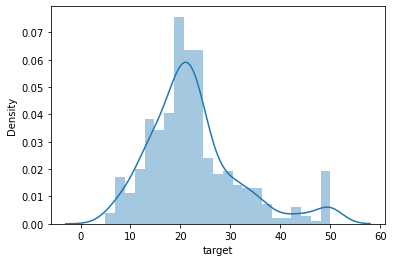

In [7]:
sns.distplot(df['target'])
plt.show()

In [8]:
cm = df.corr(method='pearson')
cm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


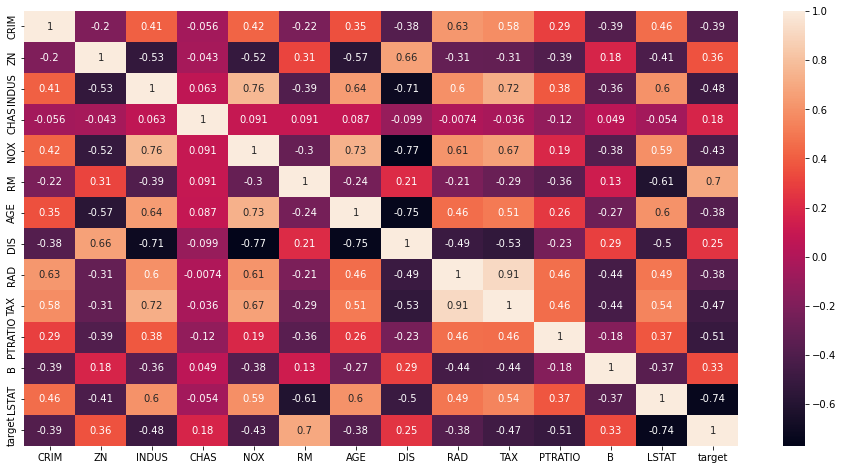

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True)
plt.show()

In [10]:
# sns.pairplot(df)
# plt.show()

In [11]:
cm['target'].sort_values(ascending=False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [12]:
cm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [13]:
cm.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'], dtype=object)

In [14]:
def correlation(cm, threshold):
    col_corr = set()
    for i in range(len(cm.columns)):
            for j in range(i):
                if (abs(cm.iloc[i, j]) >= threshold) and (cm.columns[j] not in col_corr):
                    colname = cm.columns[i] # getting the name of column
                    col_corr.add(colname)
    return col_corr

In [15]:
correlation(cm, 0.60)

{'AGE', 'DIS', 'LSTAT', 'NOX', 'RAD', 'TAX', 'target'}

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [19]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


In [20]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406801,-0.505125,-1.022256,-0.281546,-0.405218,0.125771,0.553831,-0.527348,-0.514369,-0.667776,-0.744571,0.412412,-0.476058
1,-0.411057,1.266629,-0.681651,3.551814,-0.945403,0.601965,-1.299478,0.146831,-0.630274,-0.920352,-0.300837,0.428541,-1.251858
2,-0.405120,-0.505125,2.396785,-0.281546,0.443643,-0.477130,1.085934,-0.893900,-0.630274,1.827911,0.808498,0.350317,0.795352
3,-0.406818,-0.505125,-0.046624,-0.281546,-1.236931,-0.362955,-2.208034,0.716631,-0.630274,-0.613653,0.409138,0.359533,-0.971669
4,0.195119,-0.505125,1.005500,-0.281546,1.335376,-0.039923,0.832552,-0.658340,1.687825,1.557294,0.852872,0.292484,0.682714


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
sorted(lr.coef_, reverse=True)

[2.913857995549767,
 2.094193030043762,
 1.0237518746406002,
 0.8138642573885848,
 0.8084399775400867,
 0.34313465570479407,
 -0.298939175503921,
 -1.108346015417753,
 -1.4470673128119864,
 -1.7980429490588945,
 -2.0523223240868194,
 -2.9425114769806933,
 -3.8857900211493854]

In [23]:
pd.DataFrame(data = lr.coef_, index = X_train.columns)

,0
CRIM,-1.108346
ZN,0.808440
INDUS,0.343135
CHAS,0.813864
NOX,-1.798043
RM,2.913858
AGE,-0.298939
DIS,-2.942511
RAD,2.094193
TAX,-1.447067


In [24]:
y_pred = lr.predict(X_test)

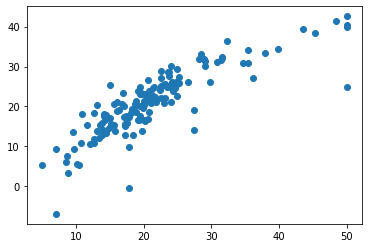

In [25]:
plt.scatter(y_test, y_pred)
plt.show()

In [26]:
residual = y_test - y_pred
residual

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: target, Length: 152, dtype: float64

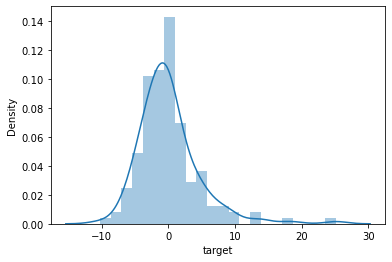

In [27]:
sns.distplot(residual)
plt.show()

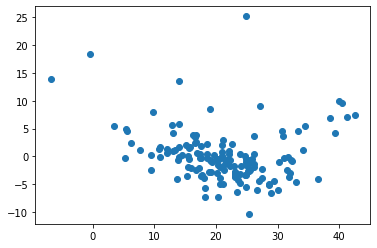

In [28]:
plt.scatter(y_pred, residual)
plt.show()

In [29]:
r2 = r2_score(y_test, y_pred)
r2

0.7112260057484932

In [30]:
mean_absolute_error(y_test, y_pred)

3.1627098714574053

In [31]:
mean_squared_error(y_test, y_pred)

21.51744423117721

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.6386899261728205

In [33]:
adjusted_r2_score = 1 - (1-r2)*len(y_test-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2_score

0.6819300932881953

In [34]:
test_data = [-0.41138429, -0.50512499,  0.40222429, -0.28154625, -1.03114628,
         0.31095713, -0.64430434,  1.03367793, -0.6302741 , -0.70987188,
        -1.01081103,  0.38188318, -0.70837543]

test_data = np.array(test_data)
test_data = test_data.reshape(1,-1)
test_data = scaler.transform(test_data)

In [35]:
lr.predict(test_data)

array([47.70839])

In [36]:
import pickle

In [37]:
pickle.dump(lr, open('model.pkl', 'wb'))

In [38]:
reloaded_model = pickle.load(open('model.pkl', 'rb'))
reloaded_model.predict(test_data)

array([47.70839])

In [39]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [64]:
# temp data

X_test.loc[1].to_dict()

{'CRIM': -0.4110567437766413,
 'ZN': 1.2666287418267723,
 'INDUS': -0.6816506802395275,
 'CHAS': 3.551814270958521,
 'NOX': -0.9454027129672087,
 'RM': 0.6019646628161058,
 'AGE': -1.2994781488608218,
 'DIS': 0.1468309218388843,
 'RAD': -0.6302740961096303,
 'TAX': -0.9203515170988416,
 'PTRATIO': -0.300836614779051,
 'B': 0.42854113323340726,
 'LSTAT': -1.251857545482923}